# Agenda 
* Utilizar uma máscara do banco de dados e
* sintetizar uma amostra
* Comparar imagem original e sintetica 


In [4]:
import metrics as m
import cv2
from metrics import mse, ssim, lbp_distance
import suport.patchesMethods as pm

In [5]:
# load the two input images result\57cb8af8.jpg
imageA = cv2.imread(r"result\\1bd1c8c771.png",0)
#imageB = cv2.imread(r"result\\57cb8af8.jpg",0)
imageB = cv2.imread(r"result\\73be8191.jpg",0)
# imageA = cv2.imread(r"result\\0bdd44d530.png")


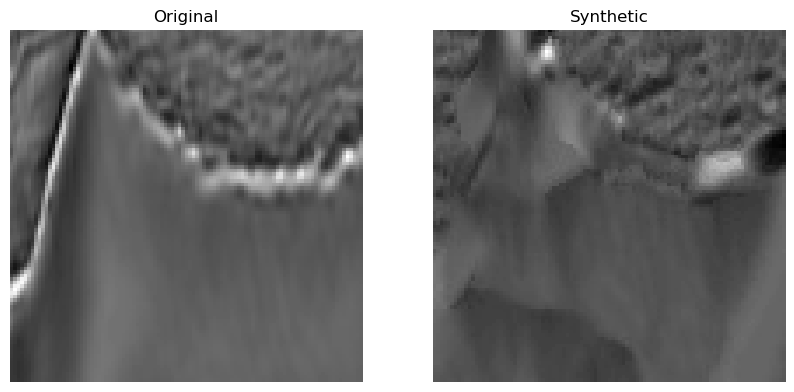

MSE: 702.7116949318694
Euclidean Distance: 0.43553540110588074
SSIM: 0.5197069453753913


In [3]:
images = [imageA,imageB]
titles = ["Original","Synthetic"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

# compute the MSE between the two images
m = mse(imageA, imageB)
# compute the SSIM between the two images
s = ssim(imageA, imageB)
# compute euclidean distance
euclidean_distance = lbp_distance(imageA, imageB)
print(f"MSE: {m}")
print(f"Euclidean Distance: {euclidean_distance}")
print(f"SSIM: {s}")

In [18]:
# compute the MSE between the two images
m = mse(imageA, imageB)
print(f"MSE: {m}")

MSE: 1231.0785217135574


In [19]:
# compute the MSE between the two images
m = mse(imageA, imageB)

# compute the SSIM between the two images
s = ssim(imageA, imageB)
# compute euclidean distance
euclidean_distance = lbp_distance(imageA, imageB)

print(f"MSE: {m}")
print(f"Euclidean Distance: {euclidean_distance}")


print(f"SSIM: {s}")


MSE: 1231.0785217135574
Euclidean Distance: 0.3500763177871704
SSIM: 0.4237486791378935


In [13]:
df_imgs = pd.read_csv('result\\sintese.csv') 
df_imgs
for idx, row in df_imgs.iterrows():
    print(f'1')


In [10]:
import pandas as pd
import cv2

ref_image_path = 'result\\0bdd44d530.png'  # Caminho da imagem de referência
ref = cv2.imread(ref_image_path, 0)  # Lê a imagem de referência em escala de cinza

# Carregar o arquivo CSV com os caminhos das imagens
df_imgs = pd.read_csv('result\\sintese.csv')  # O CSV deve ter colunas, por exemplo: 'img1', 'img2'

for idx, row in df_imgs.iterrows():
    print (f"Processing image: result\\{row['img1']}")
    img1 = cv2.imread('result\\'+row['img1'], 0)  
    mse_value = mse(ref, img1)
    s = ssim(ref, img1)
    euclidean_distance = lbp_distance(ref, img1)
    print (f"Image: {row['img1']}, MSE: {mse_value}, SSIM: {s}, Euclidean Distance: {euclidean_distance}")


In [22]:
import pandas as pd
import cv2

ref_image_path = 'result\\0bdd44d530.png'  # Caminho da imagem de referência
ref = cv2.imread(ref_image_path, 0)  # Lê a imagem de referência em escala de cinza

# Carregar o arquivo CSV com os caminhos das imagens
df_imgs = pd.read_csv('result\\sintese.csv')  # O CSV deve ter colunas, por exemplo: 'img1', 'img2'

In [30]:
#iterate over df_imgs
for idx, row in df_imgs.iterrows():
    print ('row')

   